In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.optimize import minimize

In [2]:
def norm(a):
    return np.linalg.norm(a);

def normal(t):
    tx, ty = t
    n = np.array([-ty, tx]);
    return n

def tangent(a, b, c):
    d1 = norm(b-a);
    d2 = norm(c-b)
    t = -a*d2/d1/(d1+d2) -b*(d1-d2)/d1/d2 + c*d1/d2/(d1+d2);
    l = norm(t);
    return (t/l)


# def polynomial_p5(x0, x1, x2, x3, x4, s1, s2, s3, s4, u)
#     s1 = norm(b-a);
#     s2 = norm(c-b) + s1;
#     s3 = norm(d-c) + s2;
#     s4 = norm(e-d) + s3;
#     u = s2;
#     r =  ((u-s1)*(u-s2)*(u-s3)*(u-s4)*x0/s1/s2/s3/s4 + \
#                           (u)*(u-s2)*(u-s3)*(u-s4)*x1/s1/(s1-s2)/(s1-s3)/(s1-s4) + \
#                           (u)*(u-s1)*(u-s3)*(u-s4)*x2/s2/(s2-s1)/(s2-s3)/(s2-s4)  + \
#                             (u)*(u-s1)*(u-s2)*(u-s4)*x3/s3/(s3-s1)/(s3-s2)/(s3-s4) + \
#                             (u)*(u-s1)*(u-s2)*(u-s3)*x4/s4/(s4-s1)/(s4-s2)/(s4-s3))
#     return r;

def tangent5(a, b, c, d, e):
    s1 = norm(b-a);
    s2 = norm(c-b) + s1;
    s3 = norm(d-c) + s2;
    s4 = norm(e-d) + s3;
    u = s2;
    #define tangent_p5(x0, x1, x2, x3, x4, s1, s2, s3, s4, u)\
    c0 = ((u-s2)*(u-s3)*(u-s4) + (u-s1)*(u-s3)*(u-s4) + (u-s1)*(u-s2)*(u-s4) + (u-s1)*(u-s2)*(u-s3))/s1/s2/s3/s4;
    c1 = ((u-s2)*(u-s3)*(u-s4) + (u)*(u-s3)*(u-s4) + (u)*(u-s2)*(u-s4) + (u)*(u-s2)*(u-s3))/s1/(s1-s2)/(s1-s3)/(s1-s4);
    c2 = ((u-s1)*(u-s3)*(u-s4) + (u)*(u-s3)*(u-s4) + (u)*(u-s1)*(u-s4) + (u)*(u-s1)*(u-s3))/s2/(s2-s1)/(s2-s3)/(s2-s4);
    c3 = ((u-s1)*(u-s2)*(u-s4) + (u)*(u-s2)*(u-s4) + (u)*(u-s1)*(u-s4) + (u)*(u-s1)*(u-s2))/s3/(s3-s1)/(s3-s2)/(s3-s4);
    c4 = ((u-s1)*(u-s2)*(u-s3) + (u)*(u-s2)*(u-s3) + (u)*(u-s1)*(u-s3) + (u)*(u-s1)*(u-s2))/s4/(s4-s1)/(s4-s2)/(s4-s3);
    
    t = a*c0 + b*c1 + c*c2 + d*c3 + e*c4;
    l = norm(t);
    return (t/l)

def kappa(t1, t2, a, b):
    n = normal(b-a);  
    kn = t2 - t1;
    kappa = norm(kn)*np.sign(np.dot(kn,n))/norm(n);
    return kappa;
    
def tangent2(ta, tb, a, b):
    n = tb - ta;
    n = n*np.sign(kappa(ta, tb, a, b))/norm(n);
    t = -normal(n);
    return t;

def centroid(a,b):
    c = (a+b)*0.5
    return c;
   
def Hermite(a,b,ta,tb,s):
    l = norm(a-b);
    return ((2*(a-b) + l*(ta+tb))*s*s*s + (-3*(a-b) - l*(2*ta+tb))*s*s +  l*ta*s + a)

def dHermite(a,b,ta,tb,s):
    l = norm(a-b);
    t = 3*(2*(a-b)/l + (ta+tb))*s*s + 2*(-3*(a-b)/l - (2*ta+tb))*s +  ta
    return (t/norm(t))

def kappa5(a,b,c,d,e):
    tb = tangent(a,b,c);
    tc = tangent(b,c,d);
    td = tangent(c,d,e);
    xl = Hermite(b,c,tb,tc,0.5);
    xr = Hermite(c,d,tc,td,0.5);
    tl = dHermite(b,c,tb,tc,0.5);
    tr = dHermite(c,d,tc,td,0.5);
    return (kappa(tl, tr, xl, xr))

def kappa4(a,b,c,d):
    tb = tangent(a,b,c);
    tc = tangent(b,c,d);
    return (kappa(tb, tc, b, c))

In [3]:
def boundary(x,y):
    xb = []
    yb = []
    for i_ in range(5):
        i = 5-i_;
        xb.append(-x[i])
        yb.append(y[i])
    l, = np.shape(x)
    for i in range(l):
        xb.append(x[i])
        yb.append(y[i])
    for i_ in range(5):
        i = (l-2)-i_
        xb.append(x[i])
        yb.append(-y[i])
    return xb,yb
def boundary_symm(s):
    sb = []
    for i_ in range(5):
        i = 5-i_;
        sb.append(s[i])
    l, = np.shape(s)
    for i in range(l):
        sb.append(s[i])
    for i_ in range(5):
        i = (l-2)-i_
        sb.append(s[i])
    return sb

def kappa_vector(xb,yb):
    l, = np.shape(xb);
    l = l - 10;
    k = []
    for i_ in range(l):
        i = i_ + 5;
        a = np.array([xb[i-2],yb[i-2]]);
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        e = np.array([xb[i+2],yb[i+2]]);
        k.append(kappa5(a,b,c,d,e))
    return k;

def kappa_centroid_vector(xb,yb):
    l, = np.shape(xb);
    l = l - 11;
    thetac = [];k = [];
    for i_ in range(l):
        i = i_ + 5;
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        e = np.array([xb[i+2],yb[i+2]]);
        xc = centroid(c,d)
        th = np.arctan2(xc[1], xc[0])
        thetac.append(th)
        k.append(kappa4(b,c,d,e))
    return thetac,k;

def dk_ds_vector(xb,yb):
    l, = np.shape(xb);
    l = l - 10;
    dkds = []
    for i_ in range(l):
        i = i_ + 5;
        a = np.array([xb[i-2],yb[i-2]]);
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        e = np.array([xb[i+2],yb[i+2]]);
        tb = tangent(a,b,c);
        tc = tangent(b,c,d);
        td = tangent(c,d,e);
        xl = Hermite(b,c,tb,tc,0.5);
        xr = Hermite(c,d,tc,td,0.5);
        kl = kappa4(a,b,c,d)
        kr = kappa4(b,c,d,e)
        val = (kr-kl)/(norm(xr-c)+norm(c-xl));
        dkds.append(val)
    return dkds;

def ddk_dsds7(z,a,b,c,d,e,f):
    tb = tangent5(z,a,b,c,d);
    tc = tangent5(a,b,c,d,e);
    td = tangent5(b,c,d,e,f);
    kl = kappa5(z,a,b,c,d)
    km = kappa5(a,b,c,d,e)
    kr = kappa5(b,c,d,e,f)
    dr = norm(b-c);
    dl = norm(c-d);
    val = ((kr-km)/dr - (km-kl)/dl)/(dl+dr);
    return val;

def ddk_dsds(a,b,c,d,e):
    tb = tangent(a,b,c);
    tc = tangent(b,c,d);
    td = tangent(c,d,e);
    xl = Hermite(b,c,tb,tc,0.5);
    xr = Hermite(c,d,tc,td,0.5);
    kl = kappa4(a,b,c,d)
    km = kappa5(a,b,c,d,e)
    kr = kappa4(b,c,d,e)
    dr = norm(xr-c);
    dl = norm(c-xl);
    val = ((kr-km)/dr - (km-kl)/dl)/(dl+dr);
    return val;

def ddk_dsds_vector(xb,yb):
    l, = np.shape(xb);
    l = l - 10;
    ddk_dsds = []
    for i_ in range(l):
        i = i_ + 5;
        a = np.array([xb[i-2],yb[i-2]]);
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        e = np.array([xb[i+2],yb[i+2]]);
        tb = tangent(a,b,c);
        tc = tangent(b,c,d);
        td = tangent(c,d,e);
        xl = Hermite(b,c,tb,tc,0.5);
        xr = Hermite(c,d,tc,td,0.5);
        kl = kappa4(a,b,c,d)
        km = kappa5(a,b,c,d,e)
        kr = kappa4(b,c,d,e)
        dr = norm(xr-c);
        dl = norm(c-xl);
        val = ((kr-km)/dr - (km-kl)/dl)/(dl+dr);
        ddk_dsds.append(val)
    return ddk_dsds;



In [4]:
f = open('circle_0', 'r')
data = np.genfromtxt(f, delimiter=',')
#plot(data[:,0],data[:,1],'o')
f.close()
l, = np.shape(data);
l = np.int(l/2)
x = []; y = [];
for i in range(l):
    x.append(data[2*i])
    y.append(data[2*i+1])
x = np.zeros(l) - x

theta = np.arctan2(y,x)

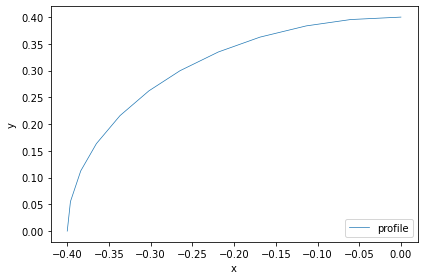

In [5]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.plot(x, y, linewidth = 0.7, label = "profile")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

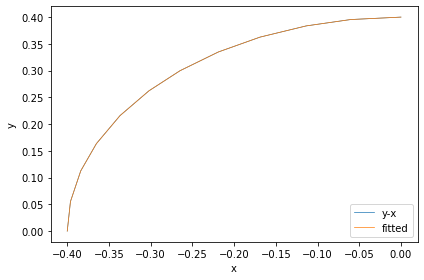

In [6]:
# cosine wave fitted to the damping wave profile
from scipy.optimize import leastsq
#parameters [guess_amp, guess_freq, guess_phase, guess_mean]
optimize_func = lambda par: np.power(x,2) + np.power(y,2) - np.power(par[0],2)
par0 = [np.max(y)]

est_radius = leastsq(optimize_func, par0)[0]

# recreate the fitted curve using the optimized parameters
xfit = est_radius*np.cos(theta)
yfit = est_radius*np.sin(theta)

fig, ax1 = plt.subplots()
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.plot(x, y, linewidth = 0.7, label = "y-x")
ax1.plot(xfit, yfit, linewidth = 0.7, label = "fitted")
ax1.legend(loc = "lower right")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

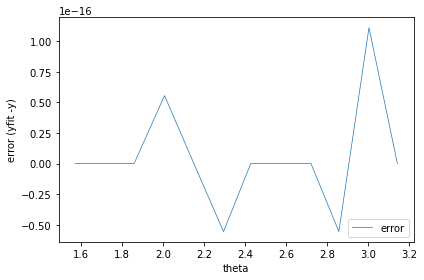

In [7]:
#error
def error (xf,yf):
    e = np.sqrt( np.power(xf,2) + np.power(yf,2)) - np.sqrt( np.power(xfit,2) + np.power(yfit,2))
    return e;
fig, ax1 = plt.subplots()
ax1.set_xlabel("theta")
ax1.set_ylabel("error (yfit -y)")
er = error(x,y)

ax1.plot(theta, er, linewidth = 0.7, label = "error")
ax1.legend(loc = "lower right")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

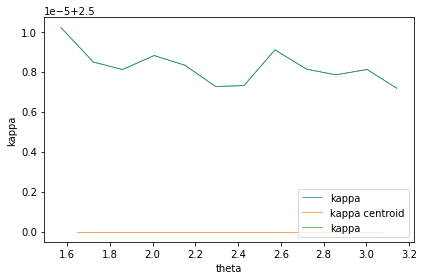

In [14]:
xb,yb = boundary(x,y)
kappav = kappa_vector(xb,yb)
thetac, kappavc = kappa_centroid_vector(xb,yb)

fig, ax1 = plt.subplots()
ax1.set_xlabel("theta")
ax1.set_ylabel("kappa")
ax1.plot(theta, kappav, linewidth = 0.7, label = "kappa")
ax1.plot(thetac, kappavc, linewidth = 0.7, label = "kappa centroid")

xb,yb = boundary(xfit,yfit)
kappav_fit = kappa_vector(xb,yb)
ax1.plot(theta, kappav_fit, linewidth = 0.7, label = "kappa")

#ax1.set_xlim(left=0.45, right=0.55);

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

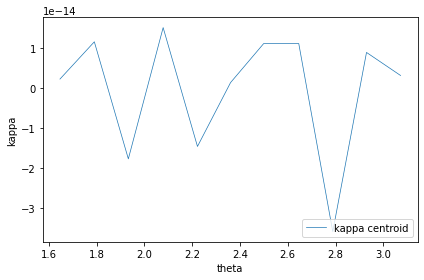

array([ 2.22044605e-15,  1.15463195e-14, -1.77635684e-14,  1.50990331e-14,
       -1.46549439e-14,  1.33226763e-15,  1.11022302e-14,  1.11022302e-14,
       -3.59712260e-14,  8.88178420e-15,  3.10862447e-15])

In [13]:
xb,yb = boundary(x,y)
thetac, kappavc = kappa_centroid_vector(xb,yb)
kappavc -= 2.5*np.ones(np.shape(kappavc))

fig, ax1 = plt.subplots()
ax1.set_xlabel("theta")
ax1.set_ylabel("kappa")
#ax1.plot(theta, kappav, linewidth = 0.7, label = "kappa")
ax1.plot(thetac, kappavc, linewidth = 0.7, label = "kappa centroid")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()
kappavc

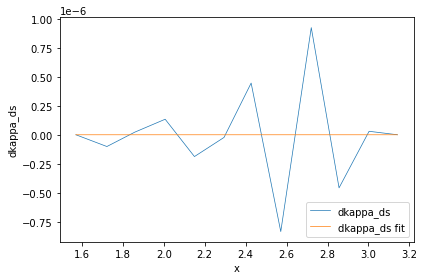

In [114]:
xb,yb = boundary(x,y)
dkappav = dk_ds_vector(xb,yb)
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("dkappa_ds")
ax1.plot(theta, dkappav, linewidth = 0.7, label = "dkappa_ds")

xb,yb = boundary(xfit,yfit)
dkappav_fit = dk_ds_vector(xb,yb)
ax1.plot(theta, dkappav_fit, linewidth = 0.7, label = "dkappa_ds fit")


ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

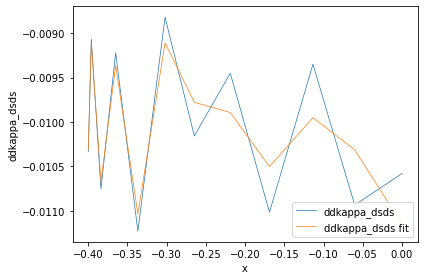

In [115]:
xb,yb = boundary(x,y)
ddkappav = ddk_dsds_vector(xb,yb)
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("ddkappa_dsds")
ax1.plot(x, ddkappav, linewidth = 0.7, label = "ddkappa_dsds")

xb,yb = boundary(x,yfit)
ddkappav_fit = ddk_dsds_vector(xb,yb)
ax1.plot(x, ddkappav_fit, linewidth = 0.7, label = "ddkappa_dsds fit")


#ax1.set_xlim(left=0.45, right=0.55);

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [116]:
#local optimisation objective fn is defined at centroid of element [c,d]
def move_point(z,a,b,c,d,e,f):
    v = -ddk_dsds7(z,a,b,c,d,e,f)*normal(tangent(b,c,d));
    #v = -ddk_dsds(a,b,c,d,e)*normal(tangent(b,c,d));
    return v;

def smooth(xf, yf, N):
    l, = np.shape(xf)
    Delta_s = 0.5*np.pi*est_radius/(l-1);
    C0 = 0.1*Delta_s**4
    for ii in range(N):
        xb, yb = boundary(xf,yf)
        #xtemp = xf#
        #ytemp = yf
        for i_ in range(l):
            i = i_ + 5;
            z = np.array([xb[i-3],yb[i-3]]);
            a = np.array([xb[i-2],yb[i-2]]);
            b = np.array([xb[i-1],yb[i-1]]);
            c = np.array([xb[i],yb[i]]);
            d = np.array([xb[i+1],yb[i+1]]);
            e = np.array([xb[i+2],yb[i+2]]);
            f = np.array([xb[i+3],yb[i+3]]);
            v = move_point(z,a,b,c,d,e,f)
            #xtemp[i_] += C0*v[0]
            yf[i_] += C0*v[1] #ytemp[i_] += C0*v[1]
        #xf = xtemp
        #yf = ytemp
    return


In [117]:
ys = np.copy(y)
xs = np.copy(x)
smooth(xs,ys,50)

ys1 = np.copy(ys)
xs1 = np.copy(xs)
smooth(xs1,ys1,50)

ys2 = np.copy(ys1)
xs2 = np.copy(xs1)
smooth(xs2,ys2,50)

ys3 = np.copy(ys2)
xs3 = np.copy(xs2)
smooth(xs3,ys3,50)

ys4 = np.copy(ys3)
xs4 = np.copy(xs3)
smooth(xs4,ys4,50)


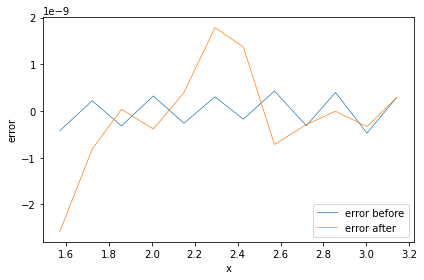

In [118]:
#error after smoothing. w.r.t to cosine fit
fig, ax1 = plt.subplots()
ax1.set_xlabel("x")
ax1.set_ylabel("error")
ax1.plot(theta, error(x,y), linewidth = 0.7, label = "error before")
ax1.plot(theta, error(xs,ys), linewidth = 0.7, label = "error after")
ax1.legend(loc = "lower right")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

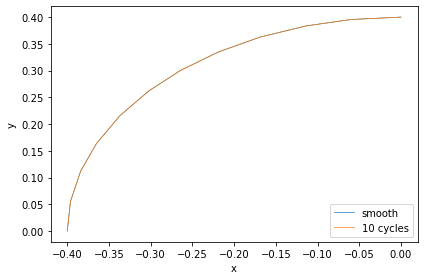

In [119]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.plot(x, y, linewidth = 0.7, label = "smooth")
ax1.plot(xs, ys, linewidth = 0.7, label = "10 cycles")


ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [136]:
xb,yb = boundary(x,y)
kappav = kappa_vector(xb,yb)
#xc,kappav = kappa_centroid_vector(xb,yb)
dkappav = dk_ds_vector(xb,yb)
ddkappav = ddk_dsds_vector(xb,yb)

xb,yb = boundary(xfit,yfit)
kappavfit = kappa_vector(xb,yb)
#xc,kappavfit = kappa_centroid_vector(xb,yb)
dkappavfit = dk_ds_vector(xb,yb)
ddkappavfit = ddk_dsds_vector(xb,yb)


xb,yb = boundary(xs,ys)
kappasv = kappa_vector(xb,yb)
#xc,kappasv = kappa_centroid_vector(xb,yb)
dkappasv = dk_ds_vector(xb,yb)
ddkappasv = ddk_dsds_vector(xb,yb)

xb,yb = boundary(xs1,ys1)
kappas1v = kappa_vector(xb,yb)
#xc,kappasv = kappa_centroid_vector(xb,yb)
dkappas1v = dk_ds_vector(xb,yb)
ddkappas1v = ddk_dsds_vector(xb,yb)

xb,yb = boundary(xs2,ys2)
kappas2v = kappa_vector(xb,yb)
#xc,kappasv = kappa_centroid_vector(xb,yb)
dkappas2v = dk_ds_vector(xb,yb)
ddkappas2v = ddk_dsds_vector(xb,yb)

xb,yb = boundary(xs3,ys3)
kappas3v = kappa_vector(xb,yb)
#xc,kappasv = kappa_centroid_vector(xb,yb)
dkappas3v = dk_ds_vector(xb,yb)
ddkappas3v = ddk_dsds_vector(xb,yb)

xb,yb = boundary(xs4,ys4)
kappas4v = kappa_vector(xb,yb)
#xc,kappasv = kappa_centroid_vector(xb,yb)
dkappas4v = dk_ds_vector(xb,yb)
ddkappas4v = ddk_dsds_vector(xb,yb)


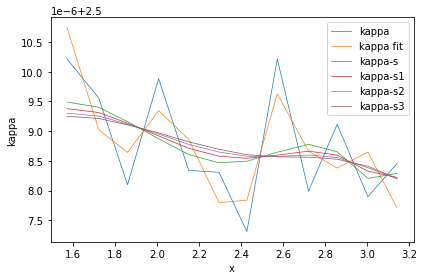

In [138]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("kappa")
ax1.plot(theta, kappav, linewidth = 0.7, label = "kappa")
ax1.plot(theta, kappavfit, linewidth = 0.7, label = "kappa fit")
ax1.plot(theta, kappasv, linewidth = 0.7, label = "kappa-s")
ax1.plot(theta, kappas1v, linewidth = 0.7, label = "kappa-s1")
ax1.plot(theta, kappas2v, linewidth = 0.7, label = "kappa-s2")
ax1.plot(theta, kappas3v, linewidth = 0.7, label = "kappa-s3")




#ax1.set_xlim(left=0.45, right=0.55);

ax1.legend(loc = "upper right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

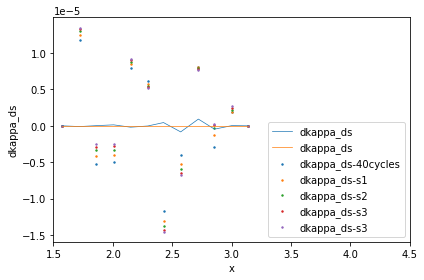

In [126]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("dkappa_ds")
#ax1.plot(x, dkappav, linewidth = 0.7, label = "dkappa_ds")
ax1.plot(theta, dkappav, linewidth = 0.7, label = "dkappa_ds")
ax1.plot(theta, dkappavfit, linewidth = 0.7, label = "dkappa_ds")
ax1.scatter(theta, dkappasv, s=2., label = "dkappa_ds-40cycles")
ax1.scatter(theta, dkappas1v, s=2., label = "dkappa_ds-s1")
ax1.scatter(theta, dkappas2v, s=2., label = "dkappa_ds-s2")
ax1.scatter(theta, dkappas3v, s=2., label = "dkappa_ds-s3")
ax1.scatter(theta, dkappas4v, s=2., label = "dkappa_ds-s3")



ax1.set_xlim(left=1.5, right=4.5);

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

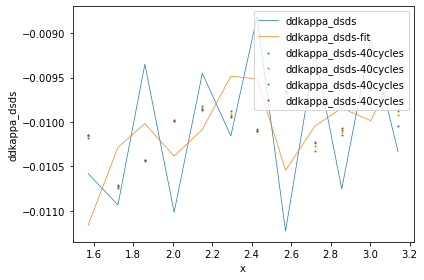

In [124]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("ddkappa_dsds")
ax1.plot(theta, ddkappav, linewidth = 0.7, label = "ddkappa_dsds")
ax1.plot(theta, ddkappavfit, linewidth = 0.7, label = "ddkappa_dsds-fit")
ax1.scatter(theta, ddkappasv, s = 1., label = "ddkappa_dsds-40cycles")
ax1.scatter(theta, ddkappas1v, s = 1., label = "ddkappa_dsds-40cycles")
ax1.scatter(theta, ddkappas2v, s = 1., label = "ddkappa_dsds-40cycles")
ax1.scatter(theta, ddkappas3v, s = 1., label = "ddkappa_dsds-40cycles")

#ax1.set_xlim(left=0.45, right=0.55);

ax1.legend(loc = "upper right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()